In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

# 1. Business Understanding
Being a football fan and a Chelsea fan, I found it quite interesting to analyze the stats of my favourite team

I will focus on the three question below:

Q. Who are the most over-performing and under-performing goalscorers in the squad?

Q. Which players are the most unlucky creators in the squad?

Q. Which players have the best minutes to goal ratio?

# 2. Data Understanding

In [4]:
Ch=pd.read_csv(r"C:/Users/lenovo/Desktop/Udacity/Udacity Data Scientist/Project 1/ChelseaStats.csv",encoding='latin1')
Ch.head()

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,G-PK90,G+A-PK90,xG,npxG,xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90
0,N'Golo Kanté,fr FRA,MF,29,14,14,1252.0,0.0,1.0,0.0,...,0.00,0.07,0.1,0.1,0.7,0.01,0.05,0.06,0.01,0.06
1,Timo Werner,de GER,FW,24,14,14,1203.0,4.0,4.0,0.0,...,0.30,0.60,6.4,6.4,2.3,0.48,0.17,0.65,0.48,0.65
2,Kurt Zouma,fr FRA,DF,26,13,13,1170.0,4.0,0.0,0.0,...,0.31,0.31,0.8,0.8,0.0,0.06,0.00,0.07,0.06,0.07
3,Mason Mount,eng ENG,"MF,FW",21,13,12,1080.0,1.0,3.0,0.0,...,0.08,0.33,1.3,1.3,2.2,0.11,0.18,0.29,0.11,0.29
4,Reece James,eng ENG,DF,21,12,11,994.0,1.0,2.0,0.0,...,0.09,0.27,0.5,0.5,1.7,0.05,0.15,0.20,0.05,0.20


In [5]:
# num of players
Ch.shape[0]

29

In [6]:
# data format for each column
Ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 26 columns):
Player       29 non-null object
Nation       29 non-null object
Pos          29 non-null object
Age          29 non-null int64
MP           29 non-null int64
Starts       29 non-null int64
Min          27 non-null float64
Gls          27 non-null float64
Ast          27 non-null float64
PK           27 non-null float64
PKatt        27 non-null float64
CrdY         27 non-null float64
CrdR         27 non-null float64
Gls90        27 non-null float64
Ast90        27 non-null float64
G+A90        27 non-null float64
G-PK90       27 non-null float64
G+A-PK90     27 non-null float64
xG           27 non-null float64
npxG         27 non-null float64
xA           27 non-null float64
xG90         27 non-null float64
xA90         27 non-null float64
xG+xA90      27 non-null float64
npxG90       27 non-null float64
npxG+xA90    27 non-null float64
dtypes: float64(20), int64(3), object(3)
memory 

In [7]:
# What kind information is provied?
Ch.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast',
       'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls90', 'Ast90', 'G+A90', 'G-PK90',
       'G+A-PK90', 'xG', 'npxG', 'xA', 'xG90', 'xA90', 'xG+xA90', 'npxG90',
       'npxG+xA90'],
      dtype='object')

# Column Description
1. Player : Name of Player
2. Nation : Nationality of the Player
3. Pos : Position on the Pitch
4. Age : Age of the Player
5. MP : Matches Played (including substitute appearances and starts)
6. Starts : The number of matches a Player has started
7. Min : Total Minutes played by the Player
8. Gls : Goals scored by the Player
9. Ast : Assists created by the Player
10. PK : Penalty Kicks
11. PKatt : Penalty Kicks attempted
12. CrdY : Yellow Cards
13. CrdR : Red Cards
14. Gls90 : Goals scored per 90 minutes
15. Ast90 : Assists created per 90 minutes
16. G+A90 : Goals plus Assists per 90 minutes
17. G-PK90 : Goals excluding Penalty kicks per 90 minutes
18. G+A-PK90 : Goals plus Assists excluding Penalty kicks per 90 minutes
19. xG : Expected Goals
20. npxG : Non-Penalty Expected goals
21. xA : Expected Assists
22. xG90 : Expected Goals per 90 minutes
23. xA90 : Expected Assists per 90 minutes
24. xG+xA90 : Expected Goals and Assists per 90 minutes
25. npxG90 : Non-Penalty expected Goals per 90
26. npxG+xA90 : Non-Penalty Expected Goals and Assists per 90 minutes

In [8]:
# missing values
Ch.isnull().sum()

Player       0
Nation       0
Pos          0
Age          0
MP           0
Starts       0
Min          2
Gls          2
Ast          2
PK           2
PKatt        2
CrdY         2
CrdR         2
Gls90        2
Ast90        2
G+A90        2
G-PK90       2
G+A-PK90     2
xG           2
npxG         2
xA           2
xG90         2
xA90         2
xG+xA90      2
npxG90       2
npxG+xA90    2
dtype: int64

# 3. Prepare Data

1. First we need to remove rows that are not required due to logical issues.

All the questions are affiliated with the attacking stats of the squad. Therefore, it does not make sense to include the goalkeepers. Therefore, we will remove the rows containing goalkeepers with the help of the drop() function. The dataset also contains the names of players who have been loaned out or transferred from Chelsea. Therefore, it makes no logical sense to include them in our analysis. Hence, they will be removed as well using the drop function.

2. Secondly, we need to create new columns for each question.

Q1. XGDiff = Gls90 - xG90
Q2. XADiff = Ast90 - xA90
Q3. MinPerGoal = Min / Gls

In [11]:
Ch=Ch.drop(28,0).drop(27,0).drop(17,0).drop(6,0).drop(20,0).drop(22,0).drop(25,0)

In [13]:
Ch['XGDiff'] = (Ch['Gls90'] - Ch['xG90'] )

In [14]:
Ch

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,G+A-PK90,xG,npxG,xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90,XGDiff
0,N'Golo Kanté,fr FRA,MF,29,14,14,1252.0,0.0,1.0,0.0,...,0.07,0.1,0.1,0.7,0.01,0.05,0.06,0.01,0.06,-0.01
1,Timo Werner,de GER,FW,24,14,14,1203.0,4.0,4.0,0.0,...,0.60,6.4,6.4,2.3,0.48,0.17,0.65,0.48,0.65,-0.18
2,Kurt Zouma,fr FRA,DF,26,13,13,1170.0,4.0,0.0,0.0,...,0.31,0.8,0.8,0.0,0.06,0.00,0.07,0.06,0.07,0.25
3,Mason Mount,eng ENG,"MF,FW",21,13,12,1080.0,1.0,3.0,0.0,...,0.33,1.3,1.3,2.2,0.11,0.18,0.29,0.11,0.29,-0.03
4,Reece James,eng ENG,DF,21,12,11,994.0,1.0,2.0,0.0,...,0.27,0.5,0.5,1.7,0.05,0.15,0.20,0.05,0.20,0.04
5,Ben Chilwell,eng ENG,DF,24,11,11,900.0,2.0,3.0,0.0,...,0.50,0.9,0.9,1.0,0.09,0.10,0.19,0.09,0.19,0.11
7,Thiago Silva,br BRA,DF,36,10,10,882.0,2.0,0.0,0.0,...,0.20,0.5,0.5,0.1,0.05,0.01,0.07,0.05,0.07,0.15
8,Kai Havertz,de GER,"MF,FW",21,12,10,768.0,1.0,1.0,0.0,...,0.23,1.3,1.3,0.7,0.16,0.08,0.23,0.16,0.23,-0.04
9,Tammy Abraham,eng ENG,FW,23,13,7,692.0,5.0,1.0,0.0,...,0.78,4.3,4.3,0.9,0.56,0.11,0.67,0.56,0.67,0.09
10,Mateo Kovacic,hr CRO,MF,26,10,6,531.0,0.0,1.0,0.0,...,0.17,0.2,0.2,0.9,0.04,0.14,0.18,0.04,0.18,-0.04


In [15]:
Ch['XADiff'] = (Ch['Ast90'] - Ch['xA90'] )
Ch

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,xG,npxG,xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90,XGDiff,XADiff
0,N'Golo Kanté,fr FRA,MF,29,14,14,1252.0,0.0,1.0,0.0,...,0.1,0.1,0.7,0.01,0.05,0.06,0.01,0.06,-0.01,0.02
1,Timo Werner,de GER,FW,24,14,14,1203.0,4.0,4.0,0.0,...,6.4,6.4,2.3,0.48,0.17,0.65,0.48,0.65,-0.18,0.13
2,Kurt Zouma,fr FRA,DF,26,13,13,1170.0,4.0,0.0,0.0,...,0.8,0.8,0.0,0.06,0.00,0.07,0.06,0.07,0.25,0.00
3,Mason Mount,eng ENG,"MF,FW",21,13,12,1080.0,1.0,3.0,0.0,...,1.3,1.3,2.2,0.11,0.18,0.29,0.11,0.29,-0.03,0.07
4,Reece James,eng ENG,DF,21,12,11,994.0,1.0,2.0,0.0,...,0.5,0.5,1.7,0.05,0.15,0.20,0.05,0.20,0.04,0.03
5,Ben Chilwell,eng ENG,DF,24,11,11,900.0,2.0,3.0,0.0,...,0.9,0.9,1.0,0.09,0.10,0.19,0.09,0.19,0.11,0.20
7,Thiago Silva,br BRA,DF,36,10,10,882.0,2.0,0.0,0.0,...,0.5,0.5,0.1,0.05,0.01,0.07,0.05,0.07,0.15,-0.01
8,Kai Havertz,de GER,"MF,FW",21,12,10,768.0,1.0,1.0,0.0,...,1.3,1.3,0.7,0.16,0.08,0.23,0.16,0.23,-0.04,0.04
9,Tammy Abraham,eng ENG,FW,23,13,7,692.0,5.0,1.0,0.0,...,4.3,4.3,0.9,0.56,0.11,0.67,0.56,0.67,0.09,0.02
10,Mateo Kovacic,hr CRO,MF,26,10,6,531.0,0.0,1.0,0.0,...,0.2,0.2,0.9,0.04,0.14,0.18,0.04,0.18,-0.04,0.03


In [144]:
Ch.sort_values('XADiff', axis=0, ascending=False)

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,xG,npxG,xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90,XGDiff,XADiff
12,Hakim Ziyech,ma MAR,FW,27-279,7.0,5.0,388,1.0,3.0,0.0,...,0.3,0.3,2.0,0.08,0.46,0.54,0.08,0.54,0.15,0.24
14,César Azpilicueta,es ESP,DF,31-117,6.0,4.0,411,0.0,1.0,0.0,...,0.1,0.1,0.0,0.01,0.01,0.02,0.01,0.02,-0.01,0.21
5,Ben Chilwell,eng ENG,DF,24-Feb,11.0,11.0,900,2.0,3.0,0.0,...,0.9,0.9,1.0,0.09,0.10,0.19,0.09,0.19,0.11,0.20
1,Timo Werner,de GER,FW,24-292,14.0,14.0,"1,203",4.0,4.0,0.0,...,6.4,6.4,2.3,0.48,0.17,0.65,0.48,0.65,-0.18,0.13
3,Mason Mount,eng ENG,"MF,FW",21-348,13.0,12.0,"1,080",1.0,3.0,0.0,...,1.3,1.3,2.2,0.11,0.18,0.29,0.11,0.29,-0.03,0.07
8,Kai Havertz,de GER,"MF,FW",21-195,12.0,10.0,768,1.0,1.0,0.0,...,1.3,1.3,0.7,0.16,0.08,0.23,0.16,0.23,-0.04,0.04
10,Mateo Kovacic,hr CRO,MF,26-231,10.0,6.0,531,0.0,1.0,0.0,...,0.2,0.2,0.9,0.04,0.14,0.18,0.04,0.18,-0.04,0.03
4,Reece James,eng ENG,DF,21-015,12.0,11.0,994,1.0,2.0,0.0,...,0.5,0.5,1.7,0.05,0.15,0.20,0.05,0.20,0.04,0.03
11,Jorginho,it ITA,MF,29-Mar,8.0,6.0,522,3.0,1.0,3.0,...,3.1,0.1,0.9,0.54,0.15,0.69,0.01,0.17,-0.02,0.02
0,N'Golo Kanté,fr FRA,MF,29-269,14.0,14.0,"1,252",0.0,1.0,0.0,...,0.1,0.1,0.7,0.01,0.05,0.06,0.01,0.06,-0.01,0.02


In [16]:
Ch['MinPerGoal'] = (Ch['Min'] / Ch['Gls'] )
Ch

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,npxG,xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90,XGDiff,XADiff,MinPerGoal
0,N'Golo Kanté,fr FRA,MF,29,14,14,1252.0,0.0,1.0,0.0,...,0.1,0.7,0.01,0.05,0.06,0.01,0.06,-0.01,0.02,inf
1,Timo Werner,de GER,FW,24,14,14,1203.0,4.0,4.0,0.0,...,6.4,2.3,0.48,0.17,0.65,0.48,0.65,-0.18,0.13,300.75
2,Kurt Zouma,fr FRA,DF,26,13,13,1170.0,4.0,0.0,0.0,...,0.8,0.0,0.06,0.00,0.07,0.06,0.07,0.25,0.00,292.50
3,Mason Mount,eng ENG,"MF,FW",21,13,12,1080.0,1.0,3.0,0.0,...,1.3,2.2,0.11,0.18,0.29,0.11,0.29,-0.03,0.07,1080.00
4,Reece James,eng ENG,DF,21,12,11,994.0,1.0,2.0,0.0,...,0.5,1.7,0.05,0.15,0.20,0.05,0.20,0.04,0.03,994.00
5,Ben Chilwell,eng ENG,DF,24,11,11,900.0,2.0,3.0,0.0,...,0.9,1.0,0.09,0.10,0.19,0.09,0.19,0.11,0.20,450.00
7,Thiago Silva,br BRA,DF,36,10,10,882.0,2.0,0.0,0.0,...,0.5,0.1,0.05,0.01,0.07,0.05,0.07,0.15,-0.01,441.00
8,Kai Havertz,de GER,"MF,FW",21,12,10,768.0,1.0,1.0,0.0,...,1.3,0.7,0.16,0.08,0.23,0.16,0.23,-0.04,0.04,768.00
9,Tammy Abraham,eng ENG,FW,23,13,7,692.0,5.0,1.0,0.0,...,4.3,0.9,0.56,0.11,0.67,0.56,0.67,0.09,0.02,138.40
10,Mateo Kovacic,hr CRO,MF,26,10,6,531.0,0.0,1.0,0.0,...,0.2,0.9,0.04,0.14,0.18,0.04,0.18,-0.04,0.03,inf


# 4. Answer Questions based on dataset

**Q1. Who are the most over-performing and under-performing goalscorers in the squad?**

In [38]:
Ch=Ch.sort_values('XGDiff', axis=0, ascending=True)
LGls=Ch.head(5)
LGls

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,npxG,xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90,XGDiff,XADiff,MinPerGoal
1,Timo Werner,de GER,FW,24,14,14,1203.0,4.0,4.0,0.0,...,6.4,2.3,0.48,0.17,0.65,0.48,0.65,-0.18,0.13,300.75
16,Olivier Giroud,fr FRA,FW,34,8,3,290.0,2.0,0.0,0.0,...,2.4,0.4,0.75,0.13,0.88,0.75,0.88,-0.13,-0.13,145.00
13,Christian Pulisic,us USA,"FW,MF",22,7,4,425.0,1.0,0.0,0.0,...,1.3,0.7,0.28,0.15,0.42,0.28,0.42,-0.07,-0.15,425.00
8,Kai Havertz,de GER,"MF,FW",21,12,10,768.0,1.0,1.0,0.0,...,1.3,0.7,0.16,0.08,0.23,0.16,0.23,-0.04,0.04,768.00
10,Mateo Kovacic,hr CRO,MF,26,10,6,531.0,0.0,1.0,0.0,...,0.2,0.9,0.04,0.14,0.18,0.04,0.18,-0.04,0.03,inf


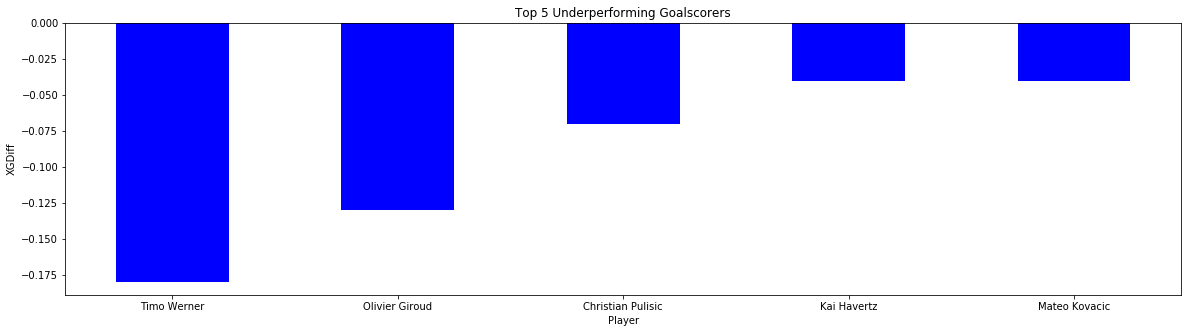

In [39]:
Pls=LGls['Player']
XGD=LGls['XGDiff']
fig = plt.figure(figsize = (20, 5)) 
# creating the bar plot 
plt.bar(Pls, XGD, color ='blue',  
        width = 0.5) 
plt.xlabel("Player") 
plt.ylabel("XGDiff") 
plt.title("Top 5 Underperforming Goalscorers") 
plt.show()

From the above graph, we can clearly see that Timo Werner is the most underperforming golascorer at Chelsea with an XGDiff of -0.175.

In [40]:
Ch=Ch.sort_values('XGDiff', axis=0, ascending=False)
HGls=Ch.head(5)
HGls

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,npxG,xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90,XGDiff,XADiff,MinPerGoal
19,Callum Hudson-Odoi,eng ENG,FW,20,5,1,171.0,1.0,0.0,0.0,...,0.3,0.2,0.15,0.11,0.26,0.15,0.26,0.38,-0.11,171.0
2,Kurt Zouma,fr FRA,DF,26,13,13,1170.0,4.0,0.0,0.0,...,0.8,0.0,0.06,0.00,0.07,0.06,0.07,0.25,0.00,292.5
7,Thiago Silva,br BRA,DF,36,10,10,882.0,2.0,0.0,0.0,...,0.5,0.1,0.05,0.01,0.07,0.05,0.07,0.15,-0.01,441.0
12,Hakim Ziyech,ma MAR,FW,27,7,5,388.0,1.0,3.0,0.0,...,0.3,2.0,0.08,0.46,0.54,0.08,0.54,0.15,0.24,388.0
5,Ben Chilwell,eng ENG,DF,24,11,11,900.0,2.0,3.0,0.0,...,0.9,1.0,0.09,0.10,0.19,0.09,0.19,0.11,0.20,450.0


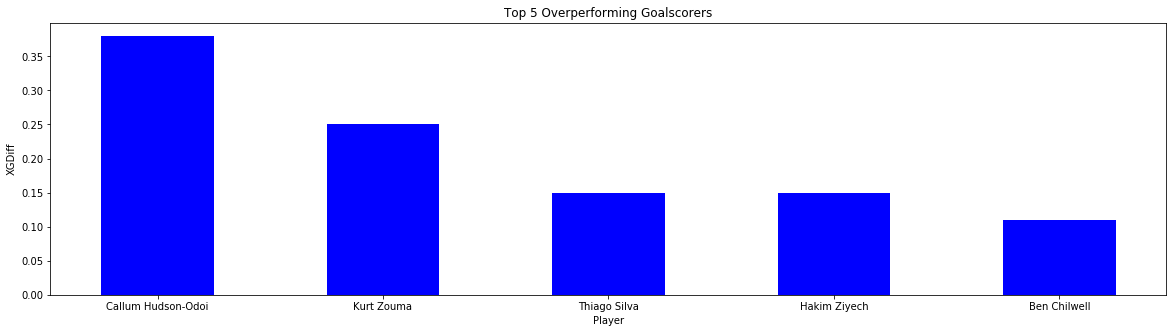

In [41]:
Pls=HGls['Player']
XGD=HGls['XGDiff']
fig = plt.figure(figsize = (20, 5)) 
# creating the bar plot 
plt.bar(Pls, XGD, color ='blue',  
        width = 0.5) 
plt.xlabel("Player") 
plt.ylabel("XGDiff") 
plt.title("Top 5 Overperforming Goalscorers") 
plt.show()

From the above graph, we can notice that Callum Hudson-Odoi is the most overperforming player at Chelsea with an XGDiff of 0.38

**Q2. Which players are the most unlucky creators in the squad?**

In [44]:
Ch=Ch.sort_values('XADiff', axis=0, ascending=False)
HAst=Ch.head(5)
HAst

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,npxG,xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90,XGDiff,XADiff,MinPerGoal
12,Hakim Ziyech,ma MAR,FW,27,7,5,388.0,1.0,3.0,0.0,...,0.3,2.0,0.08,0.46,0.54,0.08,0.54,0.15,0.24,388.00
14,César Azpilicueta,es ESP,DF,31,6,4,411.0,0.0,1.0,0.0,...,0.1,0.0,0.01,0.01,0.02,0.01,0.02,-0.01,0.21,inf
5,Ben Chilwell,eng ENG,DF,24,11,11,900.0,2.0,3.0,0.0,...,0.9,1.0,0.09,0.10,0.19,0.09,0.19,0.11,0.20,450.00
1,Timo Werner,de GER,FW,24,14,14,1203.0,4.0,4.0,0.0,...,6.4,2.3,0.48,0.17,0.65,0.48,0.65,-0.18,0.13,300.75
3,Mason Mount,eng ENG,"MF,FW",21,13,12,1080.0,1.0,3.0,0.0,...,1.3,2.2,0.11,0.18,0.29,0.11,0.29,-0.03,0.07,1080.00


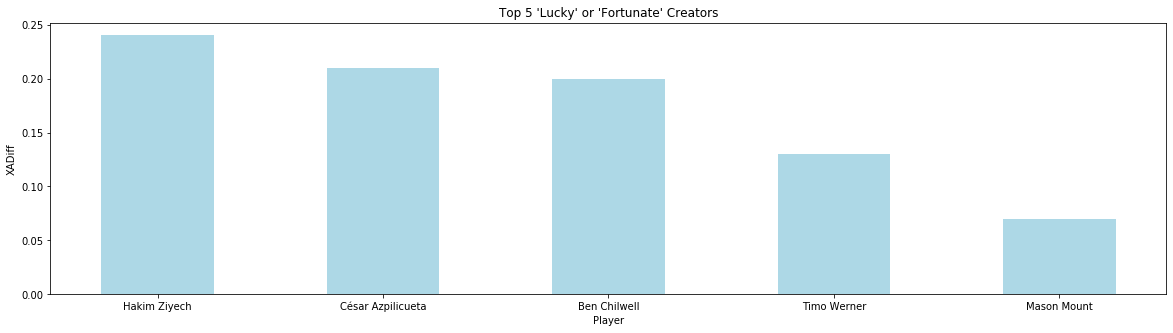

In [47]:
Pls=HAst['Player']
XAst=HAst['XADiff']
fig = plt.figure(figsize = (20, 5)) 
# creating the bar plot 
plt.bar(Pls, XAst, color ='lightblue',  
        width = 0.5) 
plt.xlabel("Player") 
plt.ylabel("XADiff") 
plt.title("Top 5 'Lucky' or 'Fortunate' Creators") 
plt.show()

From the above graph, we can see that Hakim Ziyech has the highest XADiff in the Chelsea squad with a XADiff of 0.24 . To brand this as 'lucky' or 'fortunate' would be unfair but is being done in contect to the question.

In [48]:
Ch=Ch.sort_values('XADiff', axis=0, ascending=True)
LAst=Ch.head(5)
LAst

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,npxG,xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90,XGDiff,XADiff,MinPerGoal
13,Christian Pulisic,us USA,"FW,MF",22,7,4,425.0,1.0,0.0,0.0,...,1.3,0.7,0.28,0.15,0.42,0.28,0.42,-0.07,-0.15,425.0
16,Olivier Giroud,fr FRA,FW,34,8,3,290.0,2.0,0.0,0.0,...,2.4,0.4,0.75,0.13,0.88,0.75,0.88,-0.13,-0.13,145.0
19,Callum Hudson-Odoi,eng ENG,FW,20,5,1,171.0,1.0,0.0,0.0,...,0.3,0.2,0.15,0.11,0.26,0.15,0.26,0.38,-0.11,171.0
18,Marcos Alonso,es ESP,DF,29,3,3,225.0,0.0,0.0,0.0,...,0.1,0.0,0.03,0.02,0.05,0.03,0.05,-0.03,-0.02,inf
7,Thiago Silva,br BRA,DF,36,10,10,882.0,2.0,0.0,0.0,...,0.5,0.1,0.05,0.01,0.07,0.05,0.07,0.15,-0.01,441.0


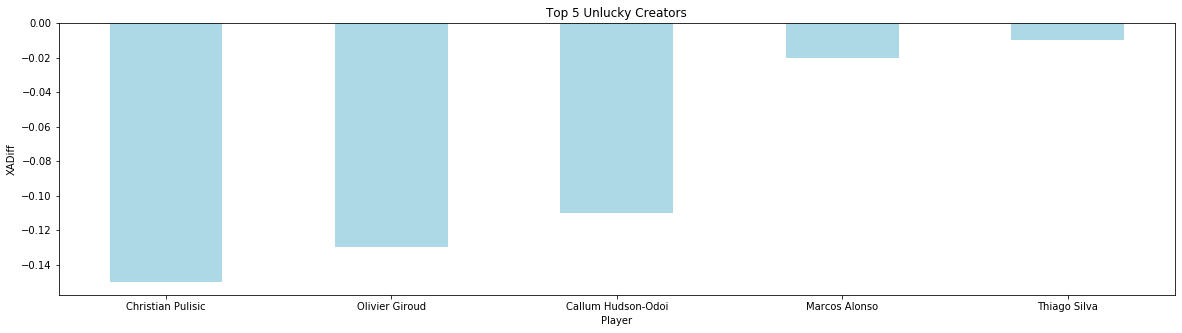

In [49]:
Pls=LAst['Player']
XAst=LAst['XADiff']
fig = plt.figure(figsize = (20, 5)) 
# creating the bar plot 
plt.bar(Pls, XAst, color ='lightblue',  
        width = 0.5) 
plt.xlabel("Player") 
plt.ylabel("XADiff") 
plt.title("Top 5 Unlucky Creators") 
plt.show()

As we can see from the above graph, Christian Pulisic has the lowest XADiff at -0.14. This means that he is expected to have 0.14 assists more than he actually has, which is either due to poor finishing or excellent goalkeeping/defending from the opposition.

**Q3. Which players have the best minutes to goal ratio?**

In [53]:
Ch=Ch.sort_values('MinPerGoal', axis=0, ascending= True)
MinPG=Ch.head(13)
MinPG

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,npxG,xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90,XGDiff,XADiff,MinPerGoal
9,Tammy Abraham,eng ENG,FW,23,13,7,692.0,5.0,1.0,0.0,...,4.3,0.9,0.56,0.11,0.67,0.56,0.67,0.09,0.02,138.40
16,Olivier Giroud,fr FRA,FW,34,8,3,290.0,2.0,0.0,0.0,...,2.4,0.4,0.75,0.13,0.88,0.75,0.88,-0.13,-0.13,145.00
19,Callum Hudson-Odoi,eng ENG,FW,20,5,1,171.0,1.0,0.0,0.0,...,0.3,0.2,0.15,0.11,0.26,0.15,0.26,0.38,-0.11,171.00
11,Jorginho,it ITA,MF,29,8,6,522.0,3.0,1.0,3.0,...,0.1,0.9,0.54,0.15,0.69,0.01,0.17,-0.02,0.02,174.00
2,Kurt Zouma,fr FRA,DF,26,13,13,1170.0,4.0,0.0,0.0,...,0.8,0.0,0.06,0.00,0.07,0.06,0.07,0.25,0.00,292.50
1,Timo Werner,de GER,FW,24,14,14,1203.0,4.0,4.0,0.0,...,6.4,2.3,0.48,0.17,0.65,0.48,0.65,-0.18,0.13,300.75
12,Hakim Ziyech,ma MAR,FW,27,7,5,388.0,1.0,3.0,0.0,...,0.3,2.0,0.08,0.46,0.54,0.08,0.54,0.15,0.24,388.00
13,Christian Pulisic,us USA,"FW,MF",22,7,4,425.0,1.0,0.0,0.0,...,1.3,0.7,0.28,0.15,0.42,0.28,0.42,-0.07,-0.15,425.00
7,Thiago Silva,br BRA,DF,36,10,10,882.0,2.0,0.0,0.0,...,0.5,0.1,0.05,0.01,0.07,0.05,0.07,0.15,-0.01,441.00
5,Ben Chilwell,eng ENG,DF,24,11,11,900.0,2.0,3.0,0.0,...,0.9,1.0,0.09,0.10,0.19,0.09,0.19,0.11,0.20,450.00


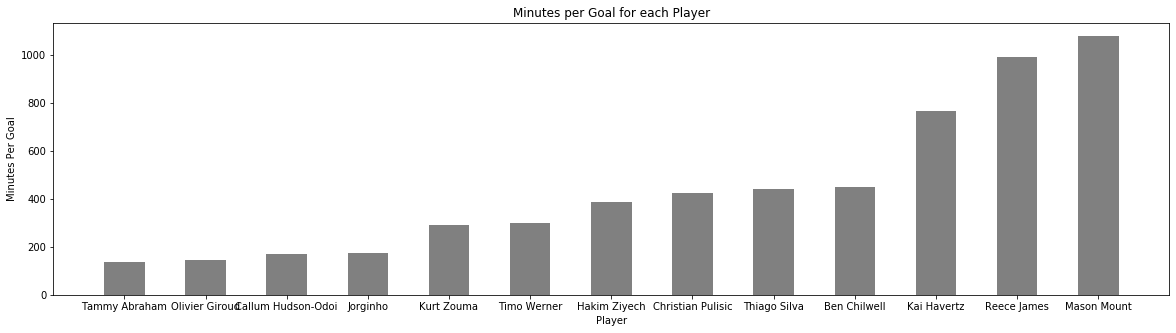

In [58]:
Pls=MinPG['Player']
MPG=MinPG['MinPerGoal']
fig = plt.figure(figsize = (20, 5)) 
# creating the bar plot 
plt.bar(Pls, MPG, color ='grey',  
        width = 0.5) 
plt.xlabel("Player") 
plt.ylabel("Minutes Per Goal") 
plt.title("Minutes per Goal for each Player") 
plt.show()

As we can see from the above graph, we can notice that Tammy Abraham has the lowest (best) Minutes per Goal at 138.40 . However, these goals include penalty goals. In order to truly understand the lethal nature of the forwards, we need to consider goals excluding penalties. In order to find this, we subtract the Penalties from the Goals.

In [61]:
MinPG['Goals-PK'] = (MinPG['Gls'] - MinPG['PK'] )
MinPG=MinPG.sort_values('Goals-PK', axis=0, ascending= False)
MinPG

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90,XGDiff,XADiff,MinPerGoal,Goals-PK
9,Tammy Abraham,eng ENG,FW,23,13,7,692.0,5.0,1.0,0.0,...,0.9,0.56,0.11,0.67,0.56,0.67,0.09,0.02,138.40,5.0
1,Timo Werner,de GER,FW,24,14,14,1203.0,4.0,4.0,0.0,...,2.3,0.48,0.17,0.65,0.48,0.65,-0.18,0.13,300.75,4.0
2,Kurt Zouma,fr FRA,DF,26,13,13,1170.0,4.0,0.0,0.0,...,0.0,0.06,0.00,0.07,0.06,0.07,0.25,0.00,292.50,4.0
5,Ben Chilwell,eng ENG,DF,24,11,11,900.0,2.0,3.0,0.0,...,1.0,0.09,0.10,0.19,0.09,0.19,0.11,0.20,450.00,2.0
7,Thiago Silva,br BRA,DF,36,10,10,882.0,2.0,0.0,0.0,...,0.1,0.05,0.01,0.07,0.05,0.07,0.15,-0.01,441.00,2.0
16,Olivier Giroud,fr FRA,FW,34,8,3,290.0,2.0,0.0,0.0,...,0.4,0.75,0.13,0.88,0.75,0.88,-0.13,-0.13,145.00,2.0
3,Mason Mount,eng ENG,"MF,FW",21,13,12,1080.0,1.0,3.0,0.0,...,2.2,0.11,0.18,0.29,0.11,0.29,-0.03,0.07,1080.00,1.0
4,Reece James,eng ENG,DF,21,12,11,994.0,1.0,2.0,0.0,...,1.7,0.05,0.15,0.20,0.05,0.20,0.04,0.03,994.00,1.0
8,Kai Havertz,de GER,"MF,FW",21,12,10,768.0,1.0,1.0,0.0,...,0.7,0.16,0.08,0.23,0.16,0.23,-0.04,0.04,768.00,1.0
13,Christian Pulisic,us USA,"FW,MF",22,7,4,425.0,1.0,0.0,0.0,...,0.7,0.28,0.15,0.42,0.28,0.42,-0.07,-0.15,425.00,1.0


In [65]:
MinPG['MinPerGoal-PK'] = (MinPG['Min'] / MinPG['Goals-PK'] )
MinPG=MinPG.sort_values('MinPerGoal-PK', axis=0, ascending=True)
MinPG=MinPG.head(12) 
MinPG

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,xG90,xA90,xG+xA90,npxG90,npxG+xA90,XGDiff,XADiff,MinPerGoal,Goals-PK,MinPerGoal-PK
9,Tammy Abraham,eng ENG,FW,23,13,7,692.0,5.0,1.0,0.0,...,0.56,0.11,0.67,0.56,0.67,0.09,0.02,138.40,5.0,138.40
16,Olivier Giroud,fr FRA,FW,34,8,3,290.0,2.0,0.0,0.0,...,0.75,0.13,0.88,0.75,0.88,-0.13,-0.13,145.00,2.0,145.00
19,Callum Hudson-Odoi,eng ENG,FW,20,5,1,171.0,1.0,0.0,0.0,...,0.15,0.11,0.26,0.15,0.26,0.38,-0.11,171.00,1.0,171.00
2,Kurt Zouma,fr FRA,DF,26,13,13,1170.0,4.0,0.0,0.0,...,0.06,0.00,0.07,0.06,0.07,0.25,0.00,292.50,4.0,292.50
1,Timo Werner,de GER,FW,24,14,14,1203.0,4.0,4.0,0.0,...,0.48,0.17,0.65,0.48,0.65,-0.18,0.13,300.75,4.0,300.75
12,Hakim Ziyech,ma MAR,FW,27,7,5,388.0,1.0,3.0,0.0,...,0.08,0.46,0.54,0.08,0.54,0.15,0.24,388.00,1.0,388.00
13,Christian Pulisic,us USA,"FW,MF",22,7,4,425.0,1.0,0.0,0.0,...,0.28,0.15,0.42,0.28,0.42,-0.07,-0.15,425.00,1.0,425.00
7,Thiago Silva,br BRA,DF,36,10,10,882.0,2.0,0.0,0.0,...,0.05,0.01,0.07,0.05,0.07,0.15,-0.01,441.00,2.0,441.00
5,Ben Chilwell,eng ENG,DF,24,11,11,900.0,2.0,3.0,0.0,...,0.09,0.10,0.19,0.09,0.19,0.11,0.20,450.00,2.0,450.00
8,Kai Havertz,de GER,"MF,FW",21,12,10,768.0,1.0,1.0,0.0,...,0.16,0.08,0.23,0.16,0.23,-0.04,0.04,768.00,1.0,768.00


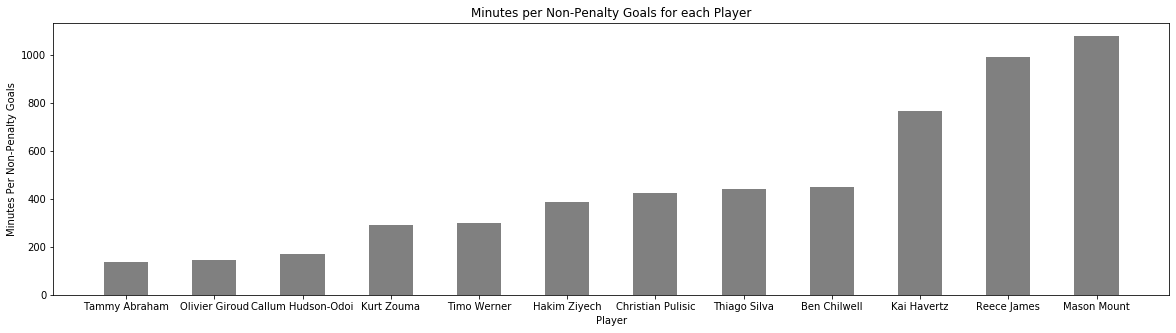

In [66]:
Pls=MinPG['Player']
MPG=MinPG['MinPerGoal-PK']
fig = plt.figure(figsize = (20, 5)) 
# creating the bar plot 
plt.bar(Pls, MPG, color ='grey',  
        width = 0.5) 
plt.xlabel("Player") 
plt.ylabel("Minutes Per Non-Penalty Goals") 
plt.title("Minutes per Non-Penalty Goals for each Player") 
plt.show()

As we can see, there is not much change since Tammy Abraham had never taken any penalties through the season. Therfore, the player with the best Minutes per Non-Penalty Goal is also Tammy Abraham.

# 5. Train model and Measure Performance

We will be using the xG related stats in order to predict the number of goals scored and also determine the most contributing parameters in the prediction. We will be using those metrics that contribute directly to the goals i.e. xG, Gls90 etc. We will not be using metrics oriented to Ast90 and Assists etc.

In [74]:
y = Ch['Gls']
x = Ch[['Gls90', 'G-PK90', 'xG', 'npxG', 'xG90', 'npxG90']]

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [85]:
ForestRegressor = RandomForestRegressor(n_estimators=500,random_state=1)
ForestRegressor.fit(x_train, y_train)
y_test_preds = ForestRegressor.predict(x_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

0.7725122222222223
0.3275824


In [88]:
coefs_df = pd.DataFrame()

coefs_df['Features'] = x_train.columns
coefs_df['Coefs'] = ForestRegressor.feature_importances_
coefs_df

,Features,Coefs
0,Gls90,0.253027
1,G-PK90,0.216883
2,xG,0.189759
3,npxG,0.176562
4,xG90,0.080586
5,npxG90,0.083183


As we can see from the above table, the 2 metrics that is contributing most to the predcition is Gls90 and G-PK90. We can also notice that the model is really accurate with a high r2 score of 0.77 and a low mean squared error of 0.33 .